Text(0, 0.5, 'Current(mA)')

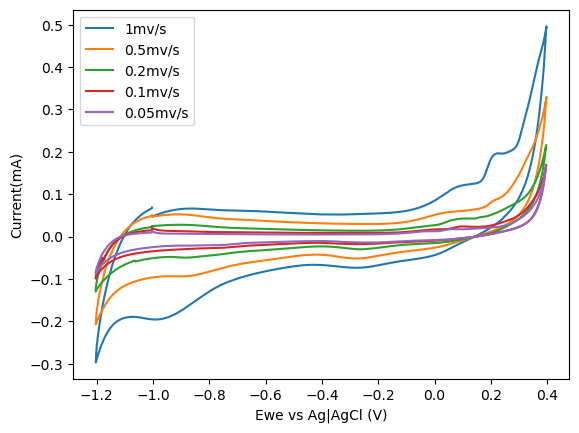

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_file(file_path):
    # Read the data from the file
    data = np.loadtxt(file_path)
    
    # Split the data into two columns
    column1 = data[:, 0]
    column2 = data[:, 1]
    column3 = data[:, 2]
    
    return column1, column2, column3

# Example usage:
file1 = 'TiO2/1mvs.csv'  
column1, column2, column3 = read_data_from_file(file1)
file2= 'TiO2/0.5mvs.csv'  
column4, column5, column6 = read_data_from_file(file2)
file3 = 'TiO2/0.2mvs.csv'  
column7, column8, column9 = read_data_from_file(file3)
file4 = 'TiO2/0.1mvs.csv'  
column10, column11, column12 = read_data_from_file(file4)
file5 = 'TiO2/0.05mvs.csv'  
column13, column14, column15 = read_data_from_file(file5)

plt.plot(column1,column2)
plt.plot(column4,column5)
plt.plot(column7,column8)
plt.plot(column10,column11)
plt.plot(column13,column14)
plt.legend(['1mv/s', '0.5mv/s', '0.2mv/s', '0.1mv/s', '0.05mv/s'])
plt.xlabel('Ewe vs Ag|AgCl (V)')
plt.ylabel('Current(mA)')

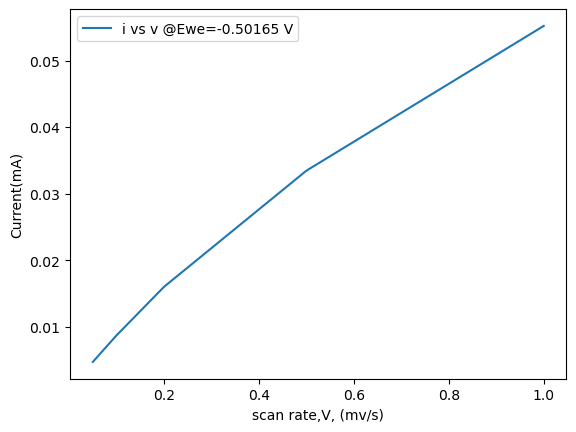

In [19]:
target =-0.50165
index = min(range(len(column1)), key=lambda i: abs(column1[i] - target))

i1=column2[index]
i2=column5[index]
i3=column8[index]
i4=column11[index]
i5=column14[index]

t=[column3[index],column6[index],column9[index],column12[index],column15[index]]

x = [1,0.5,0.2,0.1,0.05]
y=[i1,i2,i3,i4,i5]
plt.plot(x,y)
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')
plt.legend([f"i vs v @Ewe={target} V"])

TS-PG Method @E=-0.50165 V:
Fitted parameters:
a = 0.0186   b = 0.0374   c = 0.0000
R-squared: 0.9967
------------------------------------------------------------------------------------

Current Distributions(@1mv/s):
 faradaic(mA) = 0.0186     capacitive(mA) = 0.0374   pseudocapacitive(mA) = 0.0000
Charge Distributions(@1mv/s):
 faradaic(mAs) = 9.2756   capacitive(mAs) = 18.6824  pseudocapacitive(mAs) = 0.0007
 faradaic = 33.1761%       capacitive = 66.8215%     pseudocapacitive = 0.0025%
------------------------------------------------------------------------------------

Current Distributions(@0.5mv/s):
 faradaic(mA) = 0.0131     capacitive(mA) = 0.0187   pseudocapacitive(mA) = 0.0000
Charge Distributions(@0.5mv/s):
 faradaic(mAs) = 13.1176   capacitive(mAs) = 18.6824  pseudocapacitive(mAs) = 0.0005
 faradaic = 41.2498%       capacitive = 58.7487%     pseudocapacitive = 0.0015%
------------------------------------------------------------------------------------

Current Distributio

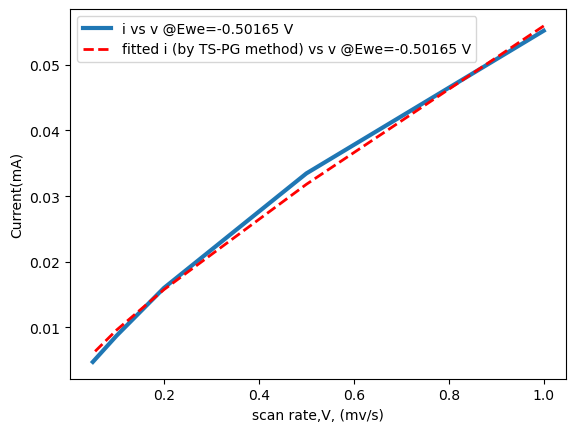

In [20]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b, c):
    return a * np.sqrt(x) + b * x + c * x**1.5

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b, c = params
print(f"TS-PG Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}   c = {c:.4f}")

y1=model(x[0],a,b,c)
y2=model(x[1],a,b,c)
y3=model(x[2],a,b,c)
y4=model(x[3],a,b,c)
y5=model(x[4],a,b,c)

ymodel=[y1,y2,y3,y4,y5]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by TS-PG method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 84)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    ipseudo = c * x[i]**1.5
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qpseudo = ipseudo * t[i]
    qtotal = qfara + qcapa + qpseudo

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    percentp = qpseudo / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.4f}     capacitive(mA) = {icapa:.4f}   pseudocapacitive(mA) = {ipseudo:.4f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.4f}   capacitive(mAs) = {qcapa:.4f}  pseudocapacitive(mAs) = {qpseudo:.4f}")
    print(f" faradaic = {percentf:.4f}%       capacitive = {percentc:.4f}%     pseudocapacitive = {percentp:.4f}%")
    print('-' * 84)

Dunn Method @E=-0.50165 V:
Fitted parameters:
a = 0.0186   b = 0.0374
R-squared: 0.9967
------------------------------------------------------------

Current Distributions(@1mv/s):
 faradaic(mA) = 0.0186     (pseudo)capacitive(mA) = 0.0374
Charge Distributions(@1mv/s):
 faradaic(mAs) = 9.2753   (pseudo)capacitive(mAs) = 18.6833
 faradaic = 33.1751%       (pseudo)capacitive = 66.8249%
------------------------------------------------------------

Current Distributions(@0.5mv/s):
 faradaic(mA) = 0.0131     (pseudo)capacitive(mA) = 0.0187
Charge Distributions(@0.5mv/s):
 faradaic(mAs) = 13.1172   (pseudo)capacitive(mAs) = 18.6833
 faradaic = 41.2485%       (pseudo)capacitive = 58.7515%
------------------------------------------------------------

Current Distributions(@0.2mv/s):
 faradaic(mA) = 0.0083     (pseudo)capacitive(mA) = 0.0075
Charge Distributions(@0.2mv/s):
 faradaic(mAs) = 20.7402   (pseudo)capacitive(mAs) = 18.6833
 faradaic = 52.6087%       (pseudo)capacitive = 47.3913%
-----

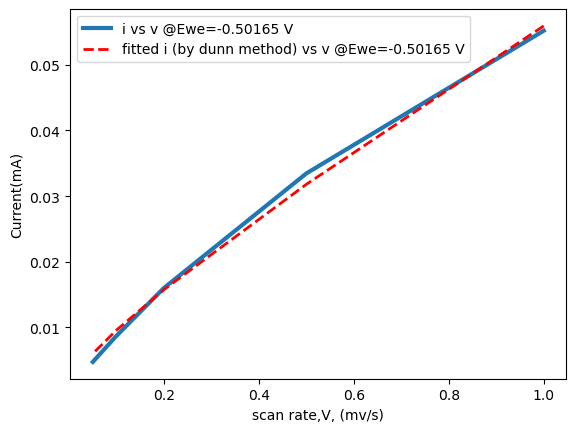

In [21]:
#dunn_method
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b):
    return a * np.sqrt(x) + b * x

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b= params
print(f"Dunn Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}")

y1=model(x[0],a,b)
y2=model(x[1],a,b)
y3=model(x[2],a,b)
y4=model(x[3],a,b)
y5=model(x[4],a,b)

ymodel=[y1,y2,y3,y4,y5]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by dunn method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 60)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qtotal = qfara + qcapa

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.4f}     (pseudo)capacitive(mA) = {icapa:.4f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.4f}   (pseudo)capacitive(mAs) = {qcapa:.4f}")
    print(f" faradaic = {percentf:.4f}%       (pseudo)capacitive = {percentc:.4f}%")
    print('-' * 60)